
Primeras filas del dataset:
   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    21.727682       4.0                NaN    59.778753
1    25.371540       4.0               17.0    57.662018
2    23.733235       2.0               14.0    56.106590
3    15.498269       4.0               15.0    53.689339
4    29.592559       4.0                5.0    46.772408

Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63099 entries, 0 to 63098
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        59945 non-null  float64
 1   Personas           59945 non-null  float64
 2   Electrodomesticos  59945 non-null  float64
 3   Consumo_kWh        59945 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB
None

Estad√≠sticas b√°sicas:
        Temperatura      Personas  Electrodomesticos   Consumo_kWh
count  59945.000000  59945.000000       59945.000000  59945.000000
mean  

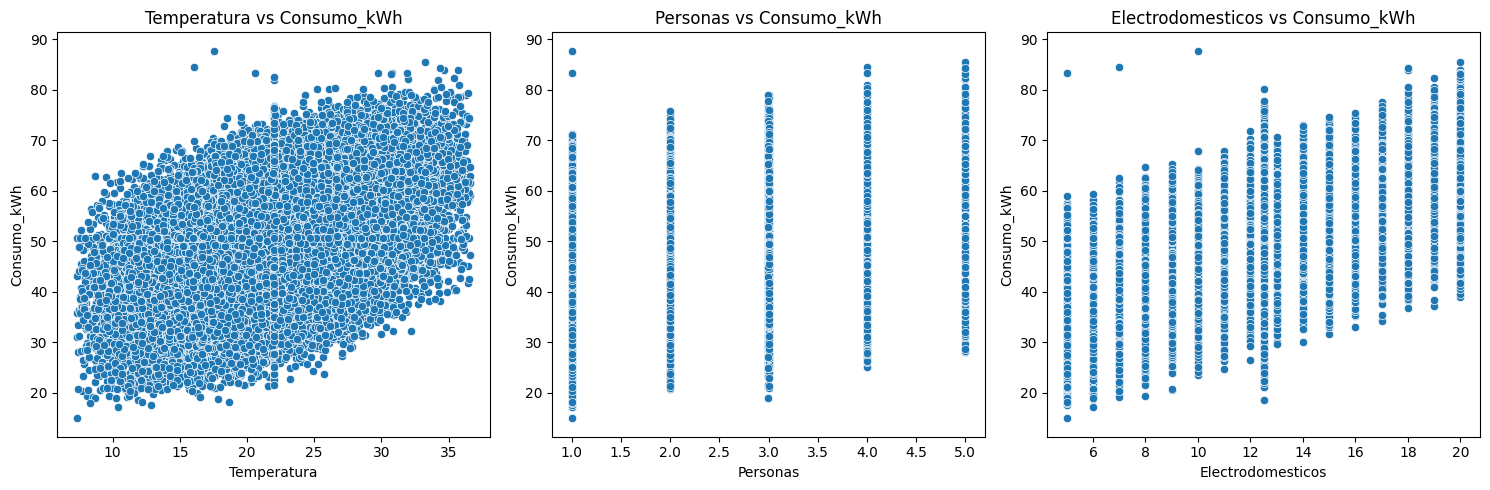


Regresi√≥n Lineal:
Coeficientes: [0.80548257 3.0431457  1.61575487]
Intercepto: 2.6111338115731755

Evaluaci√≥n de modelos:
                         Modelo        MSE        R2
0              Regresi√≥n Lineal  18.612939  0.819120
1  Regresi√≥n Polin√≥mica grado 2  18.626439  0.818989
2  Regresi√≥n Polin√≥mica grado 3  18.623570  0.819017


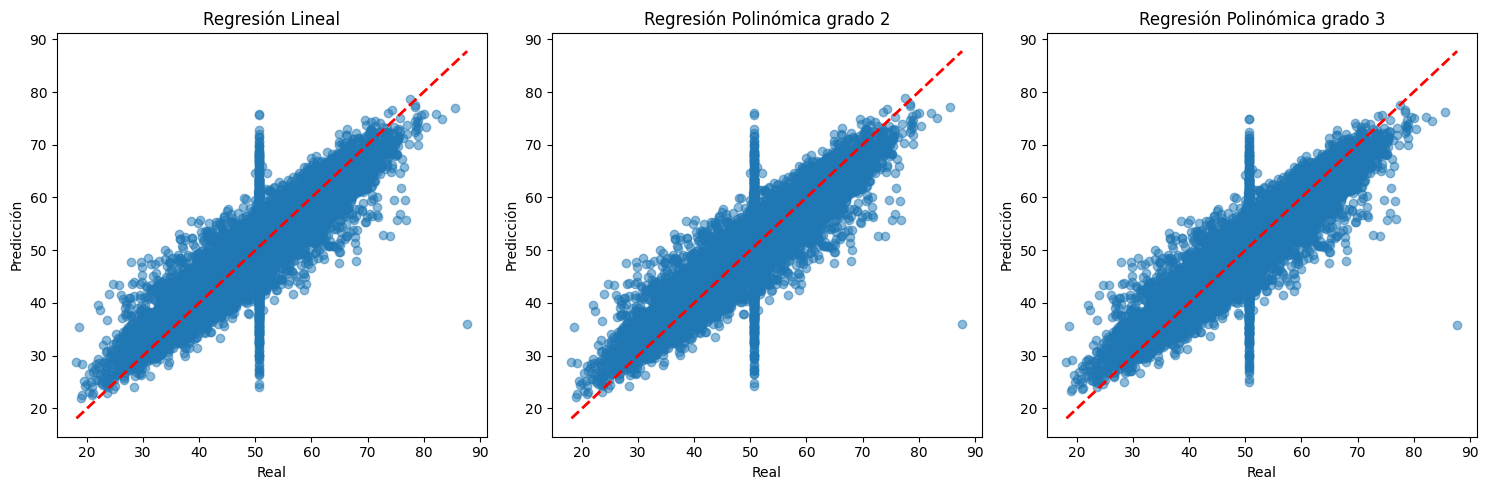


Conclusiones:
‚Üí El modelo que mejor se ajusta es: Regresi√≥n Lineal con R2 = 0.8191
‚Üí Las variables m√°s influyentes se observan en los coeficientes de la regresi√≥n lineal.
‚Üí Puede haber sobreajuste si la diferencia de R2 entre entrenamiento y prueba es muy alta.
‚Üí Recomendaci√≥n: usar modelos no lineales si se confirma relaci√≥n no lineal en los scatterplots.


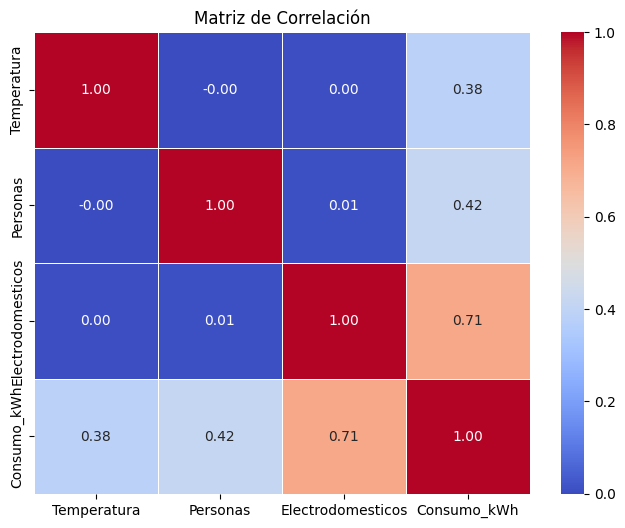

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

# 1. Carga y an√°lisis inicial
df = pd.read_csv('consumo_hogar.csv')
print("\nPrimeras filas del dataset:")
print(df.head())

print("\nInformaci√≥n general:")
print(df.info())

print("\nEstad√≠sticas b√°sicas:")
print(df.describe())

# 2. Limpieza de datos
# Imputaci√≥n de valores nulos por media
df.fillna(df.mean(numeric_only=True), inplace=True)

# Detecci√≥n de outliers con Z-Score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

print("\nDatos despu√©s de limpieza:")
print(df.describe())

# 3. Visualizaci√≥n exploratoria
plt.figure(figsize=(15, 5))
variables = ['Temperatura', 'Personas', 'Electrodomesticos']
for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=var, y='Consumo_kWh')
    plt.title(f'{var} vs Consumo_kWh')
plt.tight_layout()
plt.show()

# 4. Modelado
X = df[['Temperatura', 'Personas', 'Electrodomesticos']]
y = df['Consumo_kWh']

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## a) Regresi√≥n Lineal M√∫ltiple
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("\nRegresi√≥n Lineal:")
print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)

## b) Regresi√≥n Polin√≥mica grado 2 y 3
metrics = []

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred_poly = poly_reg.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred_poly)
    r2 = r2_score(y_test, y_pred_poly)

    metrics.append({
        'Modelo': f'Regresi√≥n Polin√≥mica grado {degree}',
        'MSE': mse,
        'R2': r2
    })

# M√©tricas Regresi√≥n Lineal
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
metrics.insert(0, {
    'Modelo': 'Regresi√≥n Lineal',
    'MSE': mse_lin,
    'R2': r2_lin
})

# 5. Evaluaci√≥n y comparaci√≥n
print("\nEvaluaci√≥n de modelos:")
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# --- Gr√°fica de predicciones vs reales ---
plt.figure(figsize=(15, 5))

# Gr√°fico 1: Regresi√≥n Lineal
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Regresi√≥n Lineal')
plt.xlabel('Real')
plt.ylabel('Predicci√≥n')

# Gr√°ficos 2 y 3: Regresiones Polin√≥micas
for i, degree in enumerate([2, 3]):
    poly = PolynomialFeatures(degree=degree)
    X_poly_test = poly.fit_transform(X_test)
    y_pred = LinearRegression().fit(poly.fit_transform(X_train), y_train).predict(X_poly_test)

    plt.subplot(1, 3, i+2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red', linestyle='--', linewidth=2)
    plt.title(f'Regresi√≥n Polin√≥mica grado {degree}')
    plt.xlabel('Real')
    plt.ylabel('Predicci√≥n')

plt.tight_layout()
plt.savefig("regresion_polinomica.png")  # üëà Guardar antes de mostrar
plt.show()

# 6. Conclusiones
print("\nConclusiones:")
best_model = df_metrics.sort_values('R2', ascending=False).iloc[0]
print(f"‚Üí El modelo que mejor se ajusta es: {best_model['Modelo']} con R2 = {best_model['R2']:.4f}")
print("‚Üí Las variables m√°s influyentes se observan en los coeficientes de la regresi√≥n lineal.")
print("‚Üí Puede haber sobreajuste si la diferencia de R2 entre entrenamiento y prueba es muy alta.")
print("‚Üí Recomendaci√≥n: usar modelos no lineales si se confirma relaci√≥n no lineal en los scatterplots.")

# 7. Matriz de correlaci√≥n
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaci√≥n')
plt.savefig("matriz_correlacion.png")  # üëà Guardar antes de mostrar
plt.show()
